El documento está en Español


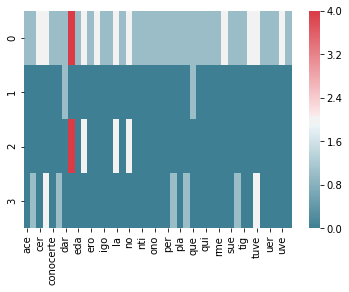

In [44]:
import pandas as pd
import math
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

coleccion =	{}

def preproceso(raw,n):
    rawS=raw.split()
    x=iter(rawS)
    i=0
    for x in rawS:
        x=x.decode('cp1252').encode('utf-8')
        x=x.replace(".","")
        x=x.replace(",","")
        x=x.replace("-","")
        x=x.replace("[","")
        x=x.replace("]","")
        x=x.replace("_","")
        x=x.replace("&","")
        x=x.replace(":","")
        x=x.replace(";","")
        x=x.replace("(","")
        x=x.replace(")","")
        x=x.replace("=","")
        #print x
        ngramas(x.lower(),n)
        #rawS[i]=x
        i=i+1
        palabra(x.lower())
    return 0

def ngramas (cadena,n):
    global coleccion
        
    if n>=len(cadena):
        if cadena in coleccion.keys():
            vector=coleccion.get(cadena)
            vector[0]=vector[0]+1
            coleccion.update({cadena:vector})
        else:
            vector=[0,0,0,0]
            vector[0]=vector[0]+1
            coleccion.update({cadena:vector})
            
        return
    else:
        auxCadena=cadena[0:n]
        if auxCadena in coleccion.keys():
            vector=coleccion.get(auxCadena)
            vector[0]=vector[0]+1
            coleccion.update({auxCadena:vector})
        else:
            vector=[0,0,0,0]
            vector[0]=vector[0]+1
            coleccion.update({auxCadena:vector})
            #print auxCadena
        
        ngramas(cadena[1:],n)
        return
    
def palabra(cadena):
    global coleccion
    
    if cadena in coleccion.keys():
        vector=coleccion.get(cadena)
        vector[0]=vector[0]+1
        coleccion.update({cadena:vector})
    else:
        vector=[0,0,0,0]
        vector[0]=vector[0]+1
        coleccion.update({cadena:vector})
    return

#main
texto = open('texto.txt')
data = texto.read()
frameCSV= pd.read_csv('Clasificador.csv')
for grama in range(1):
    grama=3
    preproceso(data,grama)
#coleccion.pop("")
vector=coleccion.keys()
auxVec=[0,0,0,0]
aux=[0,0,0,0]
auxValue=0
totENG=0
totESP=0
totPOR=0
for x in range(len(vector)):
    if vector[x] in frameCSV.head():
        auxVec=coleccion.get(vector[x])
        auxValue=auxVec[0]
        aux=frameCSV.get(vector[x])
        if aux[0]>aux[1]:
            if aux[0]>aux[2]:
                auxVec[1]=auxValue
            else:
                auxVec[3]=auxValue
        elif aux[1]>aux[2]:
            auxVec[2]=auxValue
        else:
            auxVec[3]=auxValue
        auxVec[0]=auxValue
        totPOR=totPOR+auxVec[3]
        totESP=totESP+auxVec[2]
        totENG=totENG+auxVec[1]
        coleccion.update({vector[x]:auxVec})
        #print vector[x].decode('cp1252').encode('utf-8')
frame=pd.DataFrame(coleccion)
#frame.index=["total","Ingles","Español","Portugues"]
frame.to_csv('ejemplo.csv',index=False)
#print frame
#print totENG
#print totESP
#print totPOR
if totENG>totESP:
    if totENG>totPOR:
        print "El documento está en Íngles"
    else:
        print "El documento está en Portugues"
elif totESP>totPOR:
    print "El documento está en Español"
else:
    print "El documento está en Portugues"
